In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot3d(df):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    # Creating plot
    ax.scatter3D(df['x1'],df['x2'],df['x3'], c=df['x3'])
    

    # show plot
    plt.show()

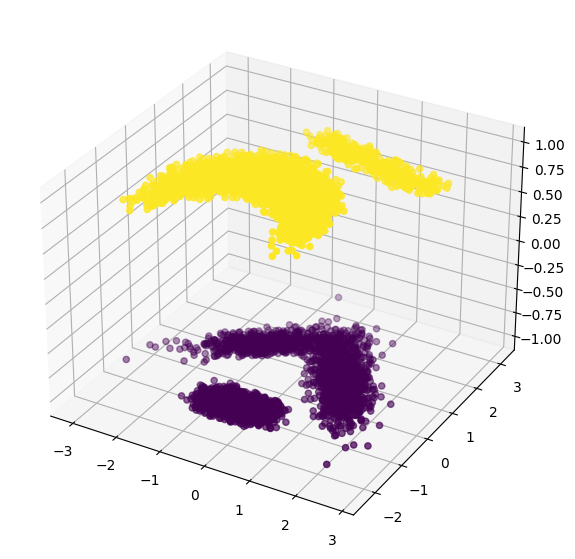

In [3]:
df = pd.DataFrame([[1,0,0],[-1,0,0],[0,-1,0],[0,1,0],[0,0,1]],columns=["x1","x2","x3"])
df = pd.read_csv("datasetraw.csv",names=["x1","x2","x3"])
plot3d(df)

[ 1.57462264e-05  1.75689057e-05 -1.03396226e-01]
Moved to center


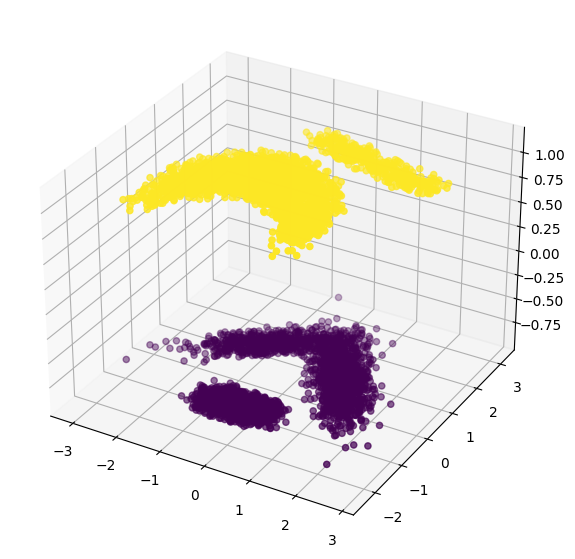

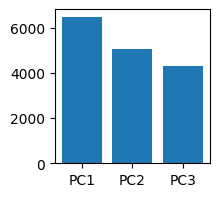

[[-0.69989411  0.2833679  -0.65563013]
 [ 0.71307547  0.22467347 -0.66411235]
 [ 0.04088543  0.93232208  0.35931034]]
[[-0.65563013  0.2833679 ]
 [-0.66411235  0.22467347]
 [ 0.35931034  0.93232208]]


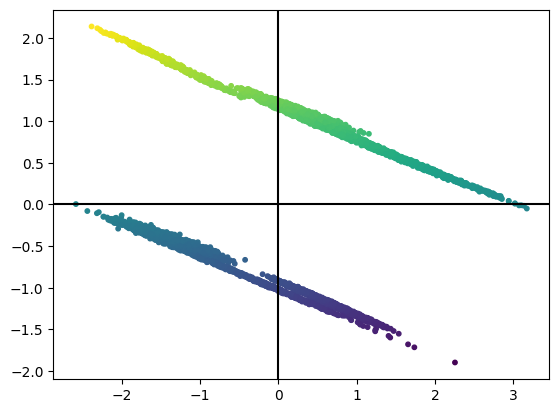

In [4]:
def PCA(df,k=2,d=3):
    def movetocenter(df):
        a=df.to_numpy()
        mean=a.sum(axis=0)/len(a)
        print(mean)
        X=a-mean
        df=pd.DataFrame(X,columns=["x1","x2","x3"])
        print("Moved to center")
        plot3d(df)
        return X
    def covmat(X):
        C=np.matmul(X.T,X)
        w,v=np.linalg.eigh(C)
        d=len(w)
        fig = plt.figure(figsize = (2,2))
        plt.bar([f"PC{i}" for i in range(1,d+1)],w[::-1])
        plt.show()
        print(v)
        return C,w,v
    
    def finalstep(X,w,v,k):
        Vk=v[:,d-k:]
        
        Vk=Vk.T[::-1].T
        print(Vk)
        X=np.matmul(X,Vk)
        plt.scatter(X[:,0],X[:,1],c=X[:,1],s=10)
        plt.axvline(x=0, c="black", label="x=0")
        plt.axhline(y=0, c="black", label="y=0")
        plt.show()
    
    X=movetocenter(df)
    C,w,v=covmat(X)
    finalstep(X,w,v,k)
    
    
PCA(df)
    

# DIABETES DATASET


In [5]:
from sklearn.preprocessing import MinMaxScaler
def scaleitright(d):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(d)
    df=pd.DataFrame(scaled,columns=d.columns)
    return df

In [6]:
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df=scaleitright(df)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [8]:
df.shape

(768, 9)

In [13]:
def PCA2(df,k=2,d=3,Ylab=[]):
    def movetocenter(df):
        a=df.to_numpy()
        mean=a.sum(axis=0)/len(a)
        print(mean)
        X=a-mean
        return X
    def covmat(X):
        C=np.matmul(X.T,X)
        w,v=np.linalg.eigh(C)
        d=len(w)
        fig = plt.figure(figsize = (2,2))
        plt.bar([f"PC{i}" for i in range(1,d+1)],w[::-1])
        plt.show()
        print(v)
        return C,w,v
    
    def finalstep(X,w,v,k,Ylab):
        Vk=v[:,d-k:]
        
        Vk=Vk.T[::-1].T
        print(Vk)
        X=np.matmul(X,Vk) 
        print(X)
        plt.scatter(X[:,0],X[:,1],c=Ylab,s=10)
        plt.axvline(x=0, c="black", label="x=0")
        plt.axhline(y=0, c="black", label="y=0")
        plt.show()
    
    X=movetocenter(df)
    C,w,v=covmat(X)
    finalstep(X,w,v,k,Ylab)
    

    

[0.22617953 0.60751021 0.56643827 0.20743897 0.09432563 0.47678954
 0.16817946 0.20401476]


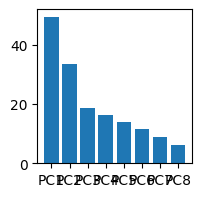

[[ 0.00287254  0.0561211   0.41486209  0.2217745   0.51093814 -0.24628749
  -0.16932416 -0.65204425]
 [-0.32167117 -0.18270188  0.24851581  0.32208297 -0.17502202  0.69388768
   0.35676608 -0.24136132]
 [-0.05024188  0.29318911  0.31359412 -0.04129694 -0.66594541 -0.45574002
   0.33104032 -0.22516492]
 [-0.48064388 -0.17492383 -0.32771914  0.06818098  0.34250382 -0.38484968
   0.59815466  0.0559239 ]
 [ 0.49384605  0.62482856 -0.18084538  0.2083738   0.23019001  0.1908919
   0.44736849  0.00386329]
 [ 0.64564397 -0.67174315  0.09345465  0.03980323 -0.04263694 -0.12259645
   0.31942511 -0.0520263 ]
 [-0.0204577   0.055106    0.33760496 -0.84473167  0.24412554  0.19359513
   0.26749398 -0.01915023]
 [ 0.04263844 -0.04718031 -0.63637434 -0.2866165  -0.18197453  0.11447898
  -0.05428262 -0.67798812]]
[[-0.65204425 -0.16932416]
 [-0.24136132  0.35676608]
 [-0.22516492  0.33104032]
 [ 0.0559239   0.59815466]
 [ 0.00386329  0.44736849]
 [-0.0520263   0.31942511]
 [-0.01915023  0.26749398]
 [-

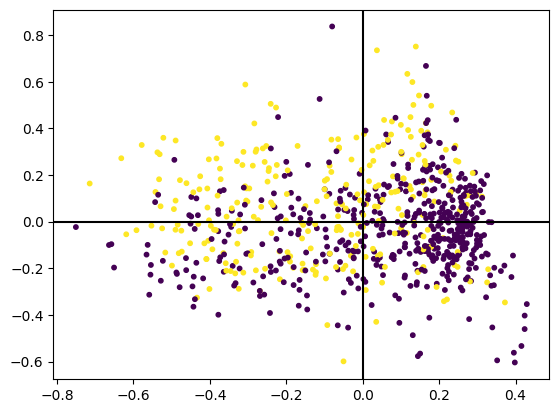

In [14]:

PCA2(df.iloc[:,:8],2,8,df.iloc[:,8])

[[ 0.30495538  0.09038229]
 [-0.19329811 -0.07295217]
 [ 0.21810848 -0.12757474]
 ...
 [ 0.00526229 -0.02210395]
 [ 0.04523188 -0.18898757]
 [-0.2650889  -0.01445655]]


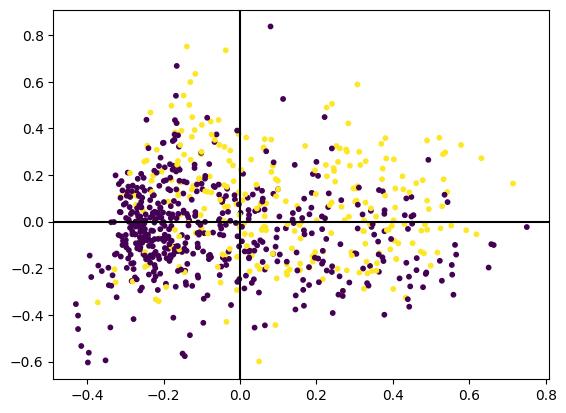

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(df.iloc[:,:8])
print(X)
plt.scatter(X[:,0],X[:,1],c=df.iloc[:,8],s=10)
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.show()